# PONTUS BLIXT, PREDIKTIV ANALYS, ÖNSKAT BETYG (VG) 

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Laddar in data


In [26]:
data = pd.read_csv('prediktiv_data.csv',index_col = 'id')
data

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,bad,bad,3,1,3,2010,1,701,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,142500,2.0,588.0,0,1003.0,1003,6,1003,6,6,...,0,NaN,bad,3,1,3,2006,0,0,1984
2927,131000,2.0,484.0,0,864.0,902,5,902,5,5,...,0,NaN,bad,2,1,6,2006,0,0,1983
2928,132000,0.0,0.0,0,912.0,970,6,970,5,5,...,0,NaN,bad,3,1,7,2006,0,0,1992


# Kikar efter NA värden 

In [27]:
na = data.isna().sum()
print(na)

target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64


# Info      

Byter namn på fe10.1 till fe24 för att enklare kunna hantera den 

Droppar feature 11 ,12, 15 då det innehåller väldigt många NaN värden  

Jag fyller på de NaN värden där endast ett värde fattas med sin features median 

In [28]:
data = data.rename(columns={'feature10.1':'feature24'})

In [29]:
data.drop(['feature11','feature12','feature15'], axis= 1,inplace=True)
data = data.fillna(data.median())

C:\Users\blixt\AppData\Local\Temp/ipykernel_11308/93717361.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [30]:
na = data.isna().sum()
print(na)

target       0
feature01    0
feature02    0
feature03    0
feature04    0
feature05    0
feature06    0
feature07    0
feature08    0
feature09    0
feature10    0
feature24    0
feature13    1
feature14    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
dtype: int64


# Gör en heatmap för att kika på features korrelation 

<function matplotlib.pyplot.show(close=None, block=None)>

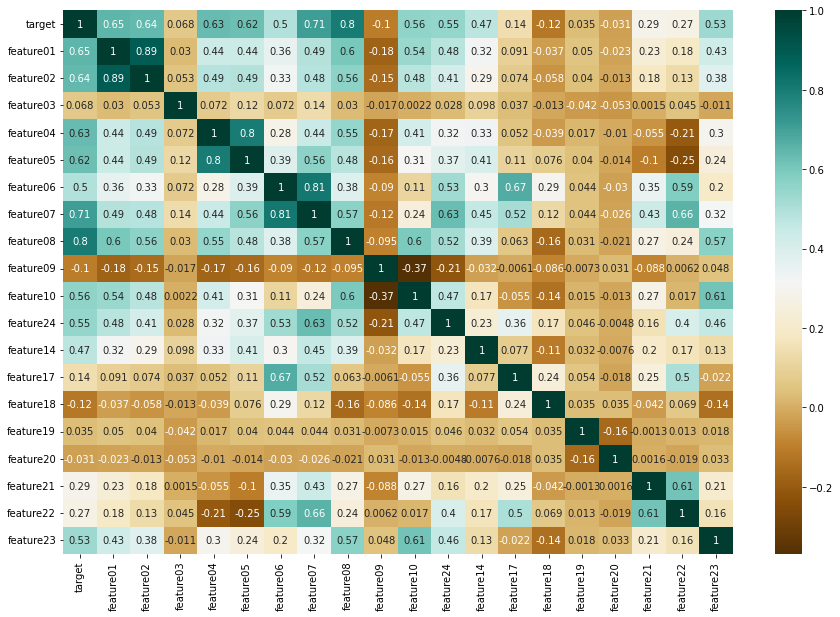

In [31]:
plt.figure(figsize = (15,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.BrBG)
plt.show

# Heatmap inspektion och beslut 
fe 01 och 02 korrelerar med varandra och lika bra med target så droppar fe 02           
fe 04 och 05 samma visa så droppar fe 05.           
fe 06 och 07 är också väldigt korrelerade men fe07 är mer korrelerad med target så jag droppar fe 06.       
Jag testade även att droppa fe07 istället för fe 06 eftersom den är mindre korrelerad med target men detta genererade ett sämre resultat 

In [8]:
data.drop(['feature02','feature05','feature06'],axis = 1, inplace = True)

# Dummies 

Skapar dummies för de features med kategoriska värden

In [9]:
data = pd.concat([data,pd.get_dummies(data['feature13'],prefix='feature13',drop_first=True)],axis = 1)
data = pd.concat([data,pd.get_dummies(data['feature16'],prefix='feature16',drop_first=True)],axis = 1)
data.drop(['feature13','feature16'],inplace = True, axis = 1)

# Skapar en dataframe för att spara mina resultat 

In [19]:
metrics = pd.DataFrame(index=['train_data_rmse', 'test_data_rmse','train_data_mae','test_data_mae','R2_train','R2_test'], 
                      columns=['linreg','NULL','KNN','LASSO','ClassTree'])

# Välja features
Väljer alla features som är större än 0.47 i korrelation till target, kommer också att välja med mina kategoriska features då jag inte kan bedömma än om de har impakt eller ej

In [11]:
prime = data.corr().loc['target']
prime.sort_values(ascending=False)
prime = prime[prime > 0.47]
prime.drop('target')
prime = list(prime.index)
prime

['target',
 'feature01',
 'feature04',
 'feature07',
 'feature08',
 'feature10',
 'feature24',
 'feature14',
 'feature23']

In [12]:
kategori_features = list(['feature13_green','feature13_red','feature13_pink','feature13_yellow','feature16_bad','feature16_good', 'feature16_horrible','feature16_okay'])
prime_fe = prime + kategori_features
prime_fe.remove('target')
prime_fe

['feature01',
 'feature04',
 'feature07',
 'feature08',
 'feature10',
 'feature24',
 'feature14',
 'feature23',
 'feature13_green',
 'feature13_red',
 'feature13_pink',
 'feature13_yellow',
 'feature16_bad',
 'feature16_good',
 'feature16_horrible',
 'feature16_okay']

# Features! 
Jag har nu valt features som jag tycker är relevanta men jag kommer göra en lasso för att få ett bättre svar på detta

# LOG
Ser en stor varians mellan 75% och max value, såg jag gjorde en plot, inte den bästa för uppgiften men den hjälpte hur som helst, med detta i åtanke ser jag att två observationer ligger långt över och kan klassas som outliers men jag ser också att det finns ett fåtal observationer mellan 500 och 600 tusen  så jag väljer istället att logaritmera target

In [13]:
data['target'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: target, dtype: float64

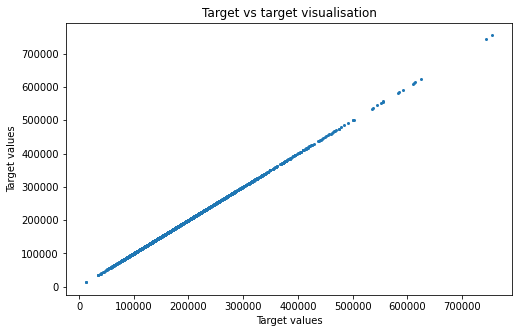

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x= data.target, y = data.target, s=4)

ax.set_title('Target vs target visualisation')
ax.set_xlabel('Target values')
ax.set_ylabel('Target values');

#  Time to model! 


In [20]:
from sklearn.model_selection import train_test_split
x = data[prime_fe]
y = np.log(data.target)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

# NULL modell   
Innan jag börjar använda mina valda modeller så gör jag en NULL modell. 
Detta hjälper mig att avgöra ifall modellerna faktiskt gör någon skillnad eller inte 

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred_null = y_train.mean()
metrics.loc['test_data_rmse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true = y_test , squared = False)
metrics.loc['train_data_rmse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train , squared = False)
metrics.loc['train_data_mae','NULL'] = mean_absolute_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
metrics.loc['test_data_mae','NULL'] = mean_absolute_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
metrics

,linreg,NULL,KNN,LASSO,ClassTree
train_data_rmse,NaN,0.412061,NaN,NaN,NaN
test_data_rmse,NaN,0.389235,NaN,NaN,NaN
train_data_mae,NaN,0.318166,NaN,NaN,NaN
test_data_mae,NaN,0.299958,NaN,NaN,NaN
R2_train,NaN,NaN,NaN,NaN,NaN
R2_test,NaN,NaN,NaN,NaN,NaN


# NULL Sammanfattning 
Null visar inte några superimponerande värden men inte heller katastrof

# Linear Regression 

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(n_jobs=-1)
linreg.fit(x_train,y_train)
metrics.loc['train_data_rmse','linreg'] = mean_squared_error(y_pred = linreg.predict(x_train),y_true = y_train,squared=False)
metrics.loc['test_data_rmse','linreg'] = mean_squared_error(y_pred = linreg.predict(x_test), y_true=y_test,squared=False)

metrics.loc['train_data_mae','linreg'] = mean_absolute_error(y_pred = linreg.predict(x_train),y_true = y_train)
metrics.loc['test_data_mae','linreg'] = mean_absolute_error(y_pred = linreg.predict(x_test), y_true=y_test)

metrics.loc['R2_train','linreg'] =r2_score (y_pred = linreg.predict(x_train), y_true=y_train)
metrics.loc['R2_test','linreg'] =r2_score (y_pred = linreg.predict(x_test), y_true=y_test)

metrics

,linreg,NULL,KNN,LASSO,ClassTree
train_data_rmse,0.164863,0.412061,NaN,NaN,NaN
test_data_rmse,0.151167,0.389235,NaN,NaN,NaN
train_data_mae,0.111322,0.318166,NaN,NaN,NaN
test_data_mae,0.109008,0.299958,NaN,NaN,NaN
R2_train,0.839925,NaN,NaN,NaN,NaN
R2_test,0.847516,NaN,NaN,NaN,NaN


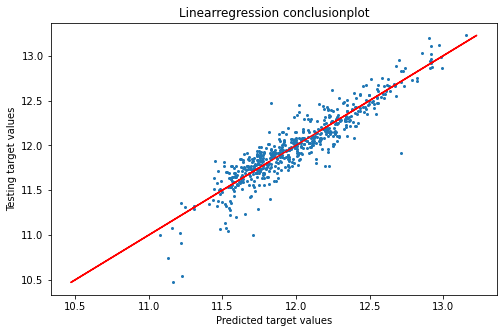

In [766]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x= linreg.predict(x_test), y = y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linearregression conclusionplot')
ax.set_xlabel('Predicted target values')
ax.set_ylabel('Testing target values');

# PLOT 
Ser bra ut, ett fåtal observationer som sticker ut men inget jag oroar mig över 

In [767]:
y_test.describe()

count    586.000000
mean      11.988543
std        0.387449
min       10.471950
25%       11.751942
50%       11.951180
75%       12.200361
max       13.226723
Name: target, dtype: float64

In [768]:
com = linreg.predict(x_test)
com = pd.Series(com)
com.describe()

count    586.000000
mean      11.993080
std        0.355300
min       11.080098
25%       11.735134
50%       11.952781
75%       12.223032
max       13.152892
dtype: float64

# Sammanfattning linear regression   

Väldigt nöjd med min linjära regression, describen ovan visar att alla värden i ypred ligger i bra linje med ytrue, även väldigt nöjd med mina error metrics och min r2 score

# KNN TIME! 


In [769]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=5) # Testat 100, 10 , 40.
kn.fit(x_train,y_train)
metrics.loc['train_data_rmse', 'KNN'] = mean_squared_error(y_pred= kn.predict(x_train),y_true = y_train,squared=False)
metrics.loc['test_data_rmse', 'KNN'] = mean_squared_error(y_pred= kn.predict(x_test),y_true = y_test,squared=False)

metrics.loc['train_data_mae', 'KNN'] = mean_absolute_error(y_pred= kn.predict(x_train),y_true = y_train)
metrics.loc['test_data_mae', 'KNN'] = mean_absolute_error(y_pred= kn.predict(x_test),y_true = y_test)

metrics.loc['R2_train','KNN'] =r2_score (y_pred = kn.predict(x_train), y_true=y_train)
metrics.loc['R2_test','KNN'] =r2_score (y_pred = kn.predict(x_test), y_true=y_test)

metrics

,linreg,NULL,KNN,LASSO,ClassTree
train_data_rmse,0.164863,0.412061,0.16551,NaN,NaN
test_data_rmse,0.151167,0.389235,0.193454,NaN,NaN
train_data_mae,0.111322,0.318166,0.115549,NaN,NaN
test_data_mae,0.109008,0.299958,0.133857,NaN,NaN
R2_train,0.839925,NaN,0.838666,NaN,NaN
R2_test,0.847516,NaN,0.750271,NaN,NaN


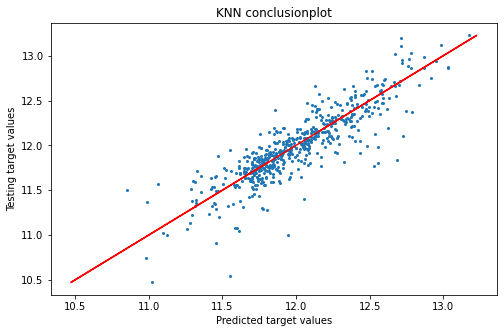

In [770]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x= kn.predict(x_test), y = y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN conclusionplot')
ax.set_xlabel('Predicted target values')
ax.set_ylabel('Testing target values');

# KNN conclusion
5 neighbors ser ut att vara bäst men det är en obalans mellan train och test data som jag inte tycker om.-  
Jag skulle vilja kalla detta overfitting men vet inte riktigt vart jag vågar dra den gränsen, hur som helst utesluter jag denna modell som den optimala för detta dataset 

# ClassTree 

In [771]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(x_train,y_train)
metrics.loc['train_data_rmse', 'ClassTree'] = mean_squared_error(y_pred= tree.predict(x_train),y_true = y_train,squared=False)
metrics.loc['test_data_rmse', 'ClassTree'] = mean_squared_error(y_pred= tree.predict(x_test),y_true = y_test,squared=False)

metrics.loc['train_data_mae', 'ClassTree'] = mean_absolute_error(y_pred= tree.predict(x_train),y_true = y_train)
metrics.loc['test_data_mae', 'ClassTree'] = mean_absolute_error(y_pred= tree.predict(x_test),y_true = y_test)

metrics.loc['R2_train','ClassTree'] =r2_score (y_pred = tree.predict(x_train), y_true=y_train)
metrics.loc['R2_test','ClassTree'] =r2_score (y_pred = tree.predict(x_test), y_true=y_test)

metrics

,linreg,NULL,KNN,LASSO,ClassTree
train_data_rmse,0.164863,0.412061,0.16551,NaN,0.166135
test_data_rmse,0.151167,0.389235,0.193454,NaN,0.202653
train_data_mae,0.111322,0.318166,0.115549,NaN,0.124334
test_data_mae,0.109008,0.299958,0.133857,NaN,0.142342
R2_train,0.839925,NaN,0.838666,NaN,0.837445
R2_test,0.847516,NaN,0.750271,NaN,0.725958


# Classification Tree conclusion   
Min classtree model visar på overfitting, med max_depth på 5 så ser den inte jättefarlig ut men så fort man rör sig upp så blir skillnaden för stor att blunda för, så jag utesluter denna metod också 

# Lasso 

In [772]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
metrics.loc['train_data_rmse', 'LASSO'] = mean_squared_error(y_pred= lasso.predict(x_train),y_true = y_train,squared=False)
metrics.loc['test_data_rmse', 'LASSO'] = mean_squared_error(y_pred= lasso.predict(x_test),y_true = y_test,squared=False)

metrics.loc['train_data_mae', 'LASSO'] = mean_absolute_error(y_pred= lasso.predict(x_train),y_true = y_train)
metrics.loc['test_data_mae', 'LASSO'] = mean_absolute_error(y_pred= lasso.predict(x_test),y_true = y_test)

metrics.loc['R2_train','LASSO'] =r2_score (y_pred = lasso.predict(x_train), y_true=y_train)
metrics.loc['R2_test','LASSO'] =r2_score (y_pred = lasso.predict(x_test), y_true=y_test)

metrics

,linreg,NULL,KNN,LASSO,ClassTree
train_data_rmse,0.164863,0.412061,0.16551,0.168758,0.166135
test_data_rmse,0.151167,0.389235,0.193454,0.150909,0.202653
train_data_mae,0.111322,0.318166,0.115549,0.112881,0.124334
test_data_mae,0.109008,0.299958,0.133857,0.108449,0.142342
R2_train,0.839925,NaN,0.838666,0.832272,0.837445
R2_test,0.847516,NaN,0.750271,0.848036,0.725958


# Lassos valda features 

In [773]:
print('Lassos features:\n')
for i,var in enumerate(x.columns[lasso.coef_>0]):
    print("{}.{}".format(i+1, var))

Lassos features:

1.feature01
2.feature04
3.feature07
4.feature08
5.feature10
6.feature14
7.feature23


# Sparar mina lasso features till längre fram 

In [774]:
lassos_fe = list(['feature01','feature04','feature07','feature08','feature10','feature14','feature23'])

# Lasso sammanfattning 
Lasso såg väldigt bra ut men den valde bort alla mina kategoriska värden, detta visar på att jag gjorde en bra feature selection utöver när det gäller det kategoriska som jag inte heller hade full koll på som jag nämnde ovan 
# 
Lassos regression överlag är väldigt bra, mina error metrics ligger i linje med min linjära regression och den har en liten ledning i r2 score, jag skulle säga att lasso är en utmärkt metod för detta datasettet men jag håller kvar till linreg 

# Sammanfattning 
Jag ser två modeller i en stark ledning, lasso och linjärregression, vilken som är bäst är något man hade fått märka med tiden. 
             


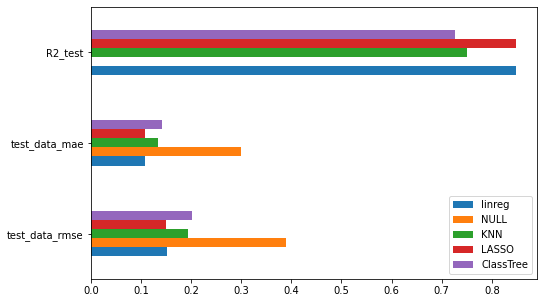

In [775]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.loc[['test_data_rmse','test_data_mae','R2_test']].plot(kind='barh', ax=ax)
ax.legend()

# PREDIKTION  linreg 

In [776]:
pred = linreg.predict(x_test)
pred = pd.Series(pred)
pred = np.exp(pred)
pred.describe()


count       586.000000
mean     172729.339427
std       68245.763659
min       64867.219483
25%      124883.237038
50%      155248.409061
75%      203420.784971
max      515499.519419
dtype: float64

# TRUE 

In [777]:
np.exp(y_test).describe()

count       586.000000
mean     173780.291809
std       73912.057552
min       35311.000000
25%      127000.000000
50%      155000.000000
75%      198861.000000
max      555000.000000
Name: target, dtype: float64

# Sammanfattning pred 
Vi kan se att prediktionen nästan satte huvudet på spiken! Mean och STD ser väldigt bra ut och kvantilerna är bra också                         
Max och min ligger också i mycket bättre linje än jag väntat mig. 



In [778]:
# Vill du se hela serien, kör denna cell 
pred

0      120989.101212
1      107427.647828
2      148510.561591
3      181389.382983
4      162286.424283
           ...      
581    101405.572691
582    137492.767851
583    168479.996561
584    218259.143737
585    170371.988784
Length: 586, dtype: float64

# En snabb plot på prediktionen vs y_true 
Lite skrämmande att titta på med statistiken ovan säger annat 

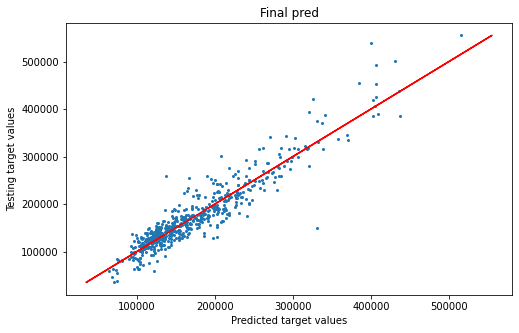

In [779]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x= pred, y = np.exp(y_test), s=4)
ax.plot(np.exp(y_test), np.exp(y_test), color='red')
ax.set_title('Final pred')
ax.set_xlabel('Predicted target values')
ax.set_ylabel('Testing target values');

# Jämföra bästa modell med fullmodel och lassos features

## Skapar dataframe för jämförelserna 

In [780]:
compare_models = pd.DataFrame(index=[ 'test_data_rmse','test_data_mae','R2_test'], 
                      columns=['my_fe_linreg','lasso_linreg','full_model_linreg'])

# Min vanliga feature selection 

In [781]:
x = data[prime_fe]
y = np.log(data.target)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)
linreg.fit(x_train,y_train)

compare_models.loc['test_data_rmse', 'my_fe_linreg'] = mean_squared_error(y_pred= linreg.predict(x_test),y_true = y_test,squared=False)

compare_models.loc['test_data_mae', 'my_fe_linreg'] = mean_absolute_error(y_pred= linreg.predict(x_test),y_true = y_test)

compare_models.loc['R2_test','my_fe_linreg'] =r2_score (y_pred = linreg.predict(x_test), y_true=y_test)

# Hela datasettet 

In [782]:
x = data.drop(['target'],axis=1)
y = np.log(data.target)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)
linreg.fit(x_train,y_train)

compare_models.loc['test_data_rmse', 'full_model_linreg'] = mean_squared_error(y_pred= linreg.predict(x_test),y_true = y_test,squared=False)

compare_models.loc['test_data_mae', 'full_model_linreg'] = mean_absolute_error(y_pred= linreg.predict(x_test),y_true = y_test)

compare_models.loc['R2_test','full_model_linreg'] =r2_score (y_pred = linreg.predict(x_test), y_true=y_test)

# Lassos features 

In [783]:
x = data[lassos_fe]
y = np.log(data.target)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)
linreg.fit(x_train,y_train)

compare_models.loc['test_data_rmse', 'lasso_linreg'] = mean_squared_error(y_pred= linreg.predict(x_test),y_true = y_test,squared=False)

compare_models.loc['test_data_mae', 'lasso_linreg'] = mean_absolute_error(y_pred= linreg.predict(x_test),y_true = y_test)

compare_models.loc['R2_test','lasso_linreg'] =r2_score (y_pred = linreg.predict(x_test), y_true=y_test)

compare_models

,my_fe_linreg,lasso_linreg,full_model_linreg
test_data_rmse,0.151167,0.153376,0.139021
test_data_mae,0.109008,0.112628,0.09872
R2_test,0.847516,0.843026,0.871035


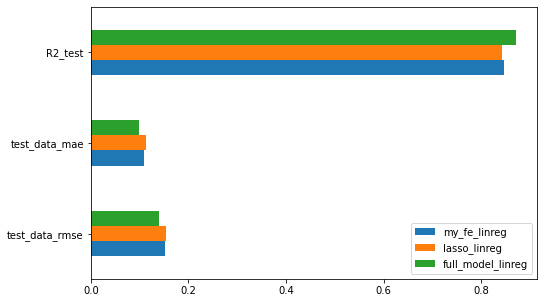

In [784]:
fig, ax = plt.subplots(figsize=(8,5))
compare_models.loc[['test_data_rmse','test_data_mae','R2_test']].plot(kind='barh', ax=ax)
ax.legend()

## README 
Som slutsats tycker jag att mina features är väl valda.                 
Jag är väldigt nyfiken på hur det kommer sig att full_model fortfarande leder dock men jag antar att det inte är några features som direkt förstör error metrics eller r2 score.            
Jag känner dock att jag valt ut de mest signifikanta featuresen och några överflödiga, i slutändan tog dock lasso fram det absolut mest signifika vilket resultera i en stor exkludering av features överlag
#
Det bästa modellerna va som nämnt ovan lasso och linjär regression, lasso vann egentligen i modellracet men jag föredrar att jobba med linjär regression och eftersom skillnaden var såpass liten så valde jag att hålla mig till den modellen         
#    
KNN va inte någon super modell och classificationtree va absolut inte med mig, båda blev olika nivåer av overfittade trots tuning av hyperparametrar så dessa modeller kunde jag snabbt se förbi som en vinnande modell 
##  
Jag hoppas du finner mina fynd intressanta och jag önskar som övre nämnt VG (PONTUS BLIXT, PREDIKTIV ANALYS )

# Källor
Mycket fina demos, gjorda av Eva Hegnar 